In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
from landmark_analyser import LandmarkAnalyser
from utils import draw_text_on_img

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose


In [9]:
def analyse_image(image_file):

    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    analyser = LandmarkAnalyser(45.0, 15.0, 75.0)
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    print(image)

    plt.imshow(image)
    plt.title('Image Analysis')
    plt.show()

    return
    results = pose.process(image)

    landmarks = results.pose_landmarks.landmark

    (
        shoulder,
        elbow,
        shoulder_angle,
        elbow_angle,
        wave_obs,
        wave_state,
        wave_count,
        wave_percentage,
        wave_performance,
    ) = analyser(landmarks, image.shape[1], image.shape[0])

    image = draw_text_on_img("{:.2f}".format(shoulder_angle), (int(shoulder[0]), int(shoulder[1])), 0.8, image)
    image = draw_text_on_img("{:.2f}".format(elbow_angle), (int(elbow[0]), int(elbow[1])), 0.8, image)
    image = draw_text_on_img(wave_obs.name, (50, 100), 1.5, image)
    image = draw_text_on_img(wave_state.name, (50, 200), 1.5, image)
    image = draw_text_on_img(f"WAVE COUNT: {wave_count}", (50, 300), 1.5, image)
    image = draw_text_on_img(f"WAVE PERC: {wave_percentage:.2f}%", (50, 400), 1.5, image)    
    image = draw_text_on_img(f"WAVE PERF: {wave_performance:.2f}%", (50, 500), 1.5, image)   

    plt.imshow(image)
    plt.title('Image Analysis')
    plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


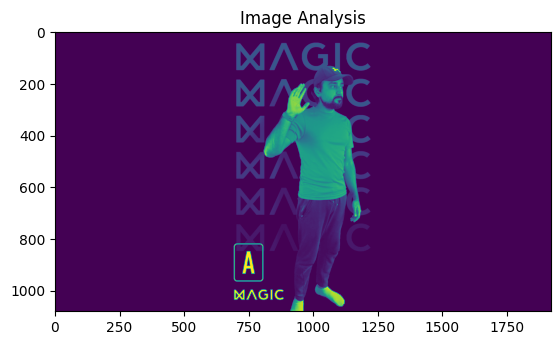

In [10]:
analyse_image('images/wave_start1.png')

In [3]:
def analyse_video(video_file):
    cap = cv2.VideoCapture(video_file)
    analyser = LandmarkAnalyser(45.0, 15.0, 75.0)

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():

            success, image = cap.read()
            if not success:      
                break

            # To improve performance, optionally mark the image as not writeable to
            # pass by reference.
            image.flags.writeable = False
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = pose.process(image)

            landmarks = results.pose_landmarks.landmark

            (
                shoulder,
                elbow,
                shoulder_angle,
                elbow_angle,
                wave_obs,
                wave_state,
                wave_count,
                wave_percentage,
                wave_performance,
            ) = analyser(landmarks, image.shape[1], image.shape[0])

            print(wave_count, wave_percentage)

    cap.release()

In [4]:
analyse_video("video/A.mp4")

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4.6427847179695725
0 6.466042342537666
0 9.014559791681446
0 11.779764008419603
0 13.900467293254822
0 15.87073258463949
0 17.72652283558319
0 19.629207534735595
0 20.533615562525434
0 21.968269546713532
0 23.57023377755711
0 25.36640973783536
0 28.588309071402566
0 31.029722918592984
0 32.344992868221354
0 33.437196737437844
0 66.41712754368844
0 66.1662084289944
0 66.11455892004464
0 66.47759277303408
0 66.83998103634701
0 68.45472256632188
0 71.47127043904354
0 74.50645094692429
0 77.12129592366156
0 78.8019583432806
0 81.2163483498172
0 83.51534566283149
0 85.53036483614548
0 87.43392456298878
0 88.97572951039614
0 91.15317493147506
0 93.44214672838993
0 94.88274452120584
0 96.38331531601278
0 97.61693301253615
0 98.26608570293237
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0.9316376400305604
1 2.74461633403192
1 4.365826928823744
1 5.6147662210157305
1 7.031994670320349
1 9.224056813598

In [5]:
analyse_video("video/B.mp4")

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3.3702009028126563
0 5.719714256786614
0 7.100817219991716
0 9.693424788134358
0 12.757875232041899
0 14.93831291127158
0 17.122775773398946
0 19.9725740711336
0 22.328340337238764
0 24.465706187276385
0 28.960003013052876
0 32.85228260773979
0 36.76148806448556
0 62.52901707085918
0 62.282694506834865
0 63.435413475497995
0 65.13339982603138
0 68.29211075515835
0 73.94914657891474
0 79.22365149980968
0 83.9397657583508
0 88.096596704275
0 92.89524514993303
0 96.61793054960187
0 99.81476685068193
0 101.74715570866641
0 102.34193305284457
1 0
1 0
1 0.485372913841459
1 2.852637439888743
1 8.273319574741162
1 13.3478813901109
1 18.466715728954313
1 24.299317033519632
1 31.837562489295777
1 37.11633416143522
1 41.79721152178775
1 43.54864263607716
1 56.64543083456165
1 58.12549981622665
1 61.54781376140937
1 66.33196709008462
1 75.47643078568